# Curtis Crandall_Homework 2
## Data Analysis and Geostatistics, Fall 2018
    Download the elevation data set
    
Assume this dataset is the true elevation for this area, with no uncertainty. For modeling
purposes, you need to know the mean, minimum, and maximum elevation of this 1km x 1km
study site, but measurements are time consuming and you can only make a finite number of
them. Estimate the mean, standard deviation, minimum and maximum elevation in this area using
different sample sizes and sampling strategies

In [62]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import iqr, kurtosis, skew, norm
import warnings
warnings.filterwarnings('ignore')  # Ignore big red block errors

# Import elevations into an array
df = pd.read_csv('elevation.csv')  # Import elevations.txt
Elevation = df.values  # create an array of values
elevation = df.values  # create a 2d array
Elevation = Elevation[~pd.isnull(Elevation)]  # remove nan values

### 1. Assuming no uncertainty and large enough sample size, we will use the complete dataset to define the true statistics of the underlying distribution of elevation. Calculate the “true” minimum q0, maximum q100, standard deviation σ and mean µ, using the entire dataset.

In [63]:
# Basic Statistic Values
elevMen = np.mean(Elevation)  # Mean
elevSTD = np.std(Elevation)  # Standard Deviation
elevMed = np.median(Elevation)  # median
elevMod = stats.mode(Elevation)  # mode; [0] index is mode value
elevMin = np.min(Elevation)  # Min
elevMax = np.max(Elevation)  # Max
elevIQR = iqr(Elevation, rng=[25,75])  # IQR
elevSKW = skew(Elevation)  # skew
elevKRT = kurtosis(Elevation)  # kurtosis

# Print stat variables
print('*Stats*')
print('Mean:     %.2f' % elevMen)
print('Median:   %.2f' % elevMed)
print('Mode:     %.2f' % elevMod[0])
print('Min:      %.2f' % elevMin)
print('Max:      %.2f' % elevMax)
print('IQR:      %.2f' % elevIQR)
print('Skew:     %.2f' % elevSKW)
print('Kurtosis: %.2f' % elevKRT)

*Stats*
Mean:     2794.57
Median:   2780.00
Mode:     2770.00
Min:      2740.00
Max:      2920.00
IQR:      40.00
Skew:     1.24
Kurtosis: 0.67


### 2. Plot a relative density histogram of the entire elevation dataset

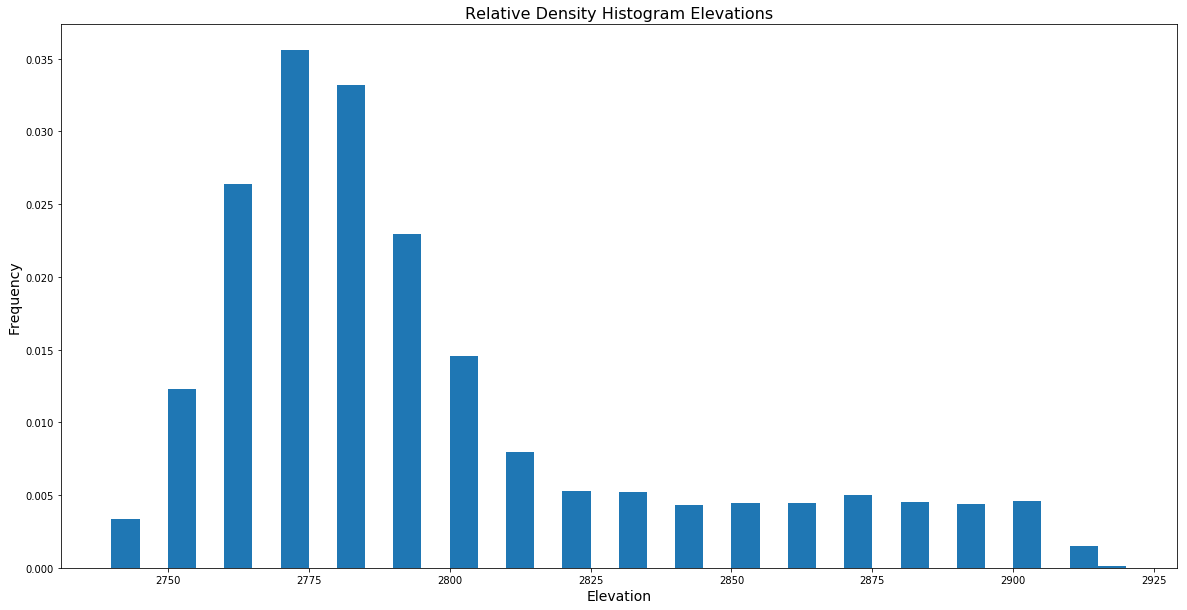

In [64]:
plt.figure(figsize=(20,10))  # create a figure
plt.hist(Elevation, bins=np.arange(min(Elevation), max(Elevation) + 5, 5), normed=True)  # histogram
plt.title('Relative Density Histogram Elevations', fontsize=16)  # title for histogram
plt.xlabel('Elevation', fontsize=14)  # x axis label for histogram
plt.ylabel('Frequency', fontsize=14)  # y axis label for histogram
plt.show()  # show figure

### 3. Randomly sample 10 measurements. Calculate the minimum, maximum, and mean elevation.

In [65]:
samples10 = np.random.choice(Elevation, size=10)  # create sample data
mean10 = np.mean(samples10)  # Mean
min10 = np.min(samples10)  # Min
max10 = np.max(samples10)  # Max
# Print stat variables
print('Mean: %.2f' % mean10)
print('Min:  %.2f' % min10)
print('Max:  %.2f' % max10)

Mean: 2781.00
Min:  2750.00
Max:  2800.00


### 4. Repeat 1000 times, storing the mean, standard deviation, minimum, and maximum elevation each time.

In [66]:
n = 1000  # sample count
Means = []  # create list for mean values
Mins  = []  # create list for min values
Maxes = []  # create list for max values
STDs  = []  # create list for STD values
samples = []  # create samples list all values
count = 0   # iteration index starting value

while count < n:
    randoms = np.random.choice(Elevation, size=10, replace=True)  # random sample data
    x = np.mean(randoms)  # random sample Mean
    Means.append(x)   # add mean to a new list
    y = np.min(randoms)  # random sample Min
    Mins.append(y)  # add min to a new list
    z = np.max(randoms)  # random sample Max
    Maxes.append(z)  # add max to a new list
    w = np.std(randoms)  # random sample Max
    STDs.append(w)  # add max to a new list
    samples.append(randoms)  # add to sample list
    count += 1  # add to the count and rerun
    
Means = np.array(Means)  # convert to numpy array
Mins = np.array(Mins)  # convert to numpy array
Maxes = np.array(Maxes)  # convert to numpy array
STDs = np.array(STDs)  # convert to numpy array
Samples = np.array(samples)  # convert to numpy array

### 5. Plot a relative density histogram of each statistic.

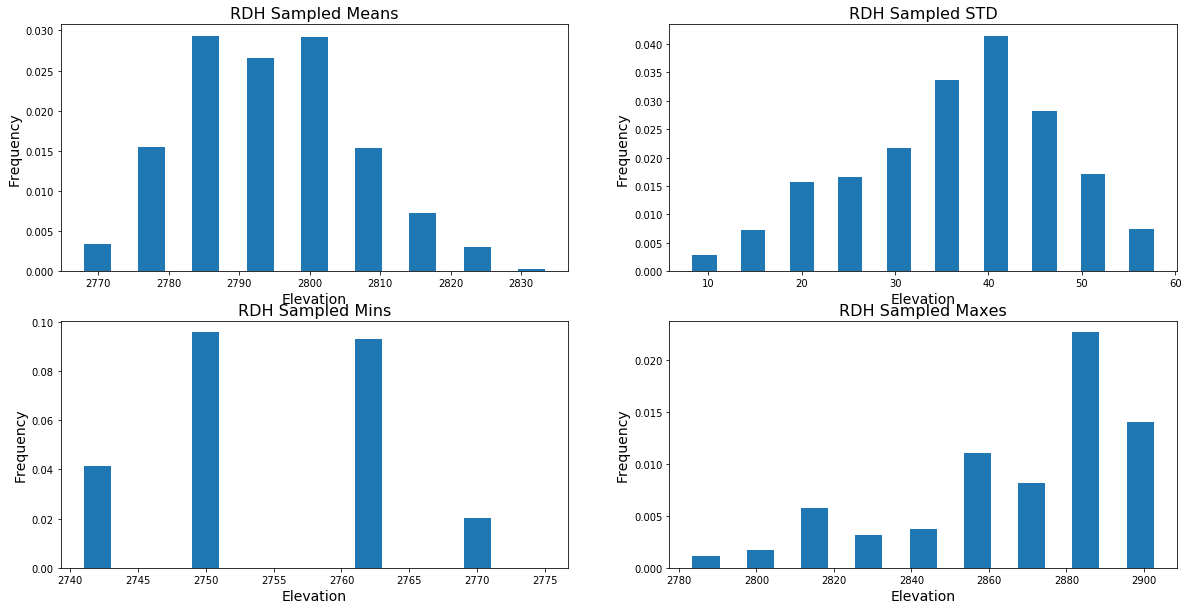

In [67]:
plt.figure(figsize=(20,10))  # create a figure
# Means
data = Means  # set data
plt.subplot(2,2,1)  # assign subplot
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # bin info
plt.hist(data,bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled Means', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info

# STD
data = STDs  # set data
plt.subplot(2,2,2)  # assign subplot
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # bin info
plt.hist(data, bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled STD', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info

# Mins
data = Mins  # set data
plt.subplot(2,2,3)  # assign subplot
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # bin info
plt.hist(data, bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled Mins', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info

# Maxes
data = Maxes  # set data
plt.subplot(2,2,4)  # assign subplot
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # bin info
plt.hist(data, bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled Maxes', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info


plt.show()                                                           # show image

### 6. Fit the Gaussian distribution to the entire elevation data set, using the true mean µ and true standard deviation σ. Plot this Gaussian curve on the same plot as your relative density histogram.

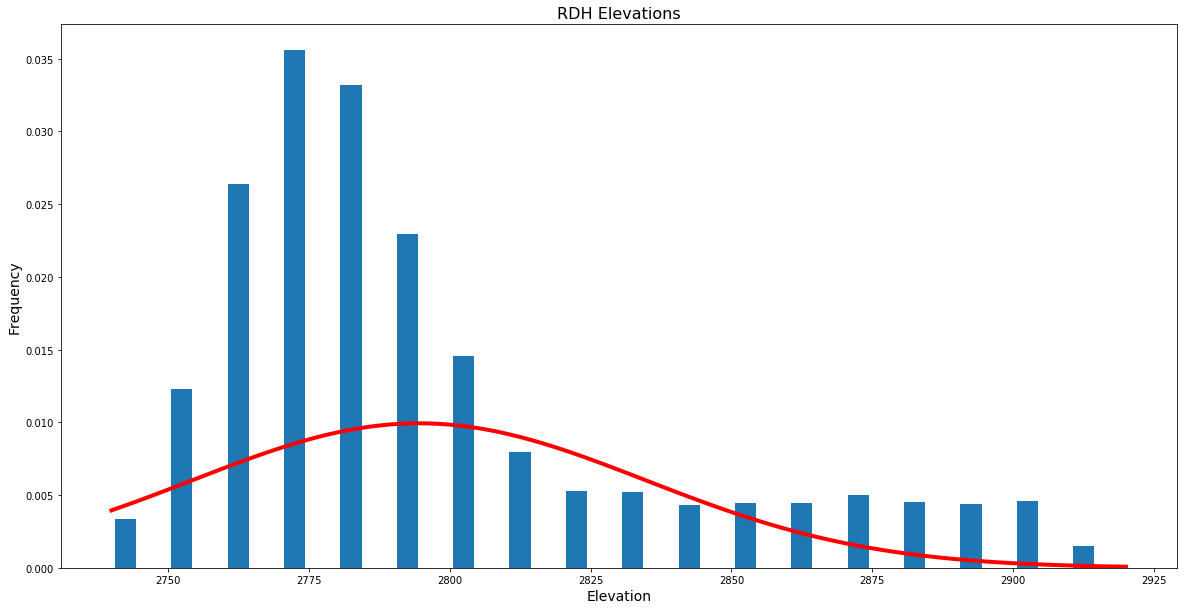

In [68]:
plt.figure(figsize=(20,10))  # create a figure
# Elevations
data = Elevation  # set data
# relative density histogram
plt.hist(data,bins=np.arange(min(Elevation), max(Elevation) + 5, 5), \
         rwidth=0.75, normed=True)
plt.title('RDH Elevations', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info
elevRange = np.linspace(elevMin, elevMax, 100)  # set a range limit for Gaus line
plt.plot(elevRange, mlab.normpdf(elevRange, elevMen, elevSTD),'r',linewidth=4)  # pdf line
plt.show()  # show figure

### 7. Fit the Gaussian distribution to each sample statistic, using your new dataset from the 1000 random subsample datasets of elevation.  Plot the Gaussian curves on your relative density histograms from above.

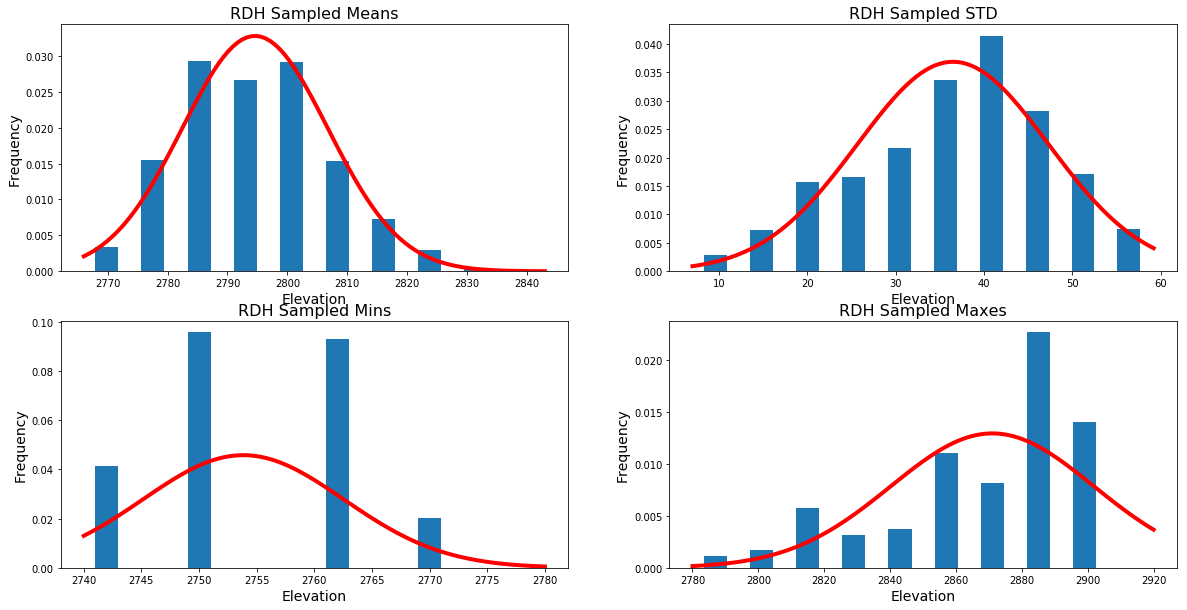

In [69]:
plt.figure(figsize=(20,10))  # create a figure
# Means
data = Means  # set data
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # set bin info
plt.subplot(2,2,1)  # assign subplot
dataRange = np.linspace(np.min(data), np.max(data), 100)  # set a range limit for Gaus line
plt.plot(dataRange,mlab.normpdf(dataRange,np.mean(data),np.std(data)),'r',linewidth=4)  # pdf line
plt.hist(data,bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled Means', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info

# STD
data = STDs  # set data
plt.subplot(2,2,2)  # assign subplot
dataRange = np.linspace(np.min(data), np.max(data), 100)  # set a range limit for Gaus line
plt.plot(dataRange,mlab.normpdf(dataRange,np.mean(data),np.std(data)),'r',linewidth=4)  # pdf line
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # set bin info
plt.hist(data, bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled STD', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info

# Mins
data = Mins  # set data
plt.subplot(2,2,3)  # assign subplot
dataRange = np.linspace(np.min(data), np.max(data), 100)  # set a range limit for Gaus line
plt.plot(dataRange,mlab.normpdf(dataRange,np.mean(data),np.std(data)),'r',linewidth=4)  # pdf line
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # set bin info
plt.hist(data, bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled Mins', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info

# Maxes
data = Maxes  # set data
plt.subplot(2,2,4)  # assign subplot
dataRange = np.linspace(np.min(data), np.max(data), 100)  # set a range limit for Gaus line
plt.plot(dataRange,mlab.normpdf(dataRange,np.mean(data),np.std(data)),'r',linewidth=4)  # pdf line
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # set bin info
plt.hist(data, bins=binWidth, rwidth=0.5, normed=True)  # relative density histogram
plt.title('RDH Sampled Maxes', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info


plt.show()

### 8. What is the probability of measuring a sample value less than the true mean?
normcdf(mean) - normcdf(min)

In [70]:
# Not completely sure what data to use for this question; seems a bit ambiguous

# sample cdf using: true mean - sample cdf min
trueMean = elevMen  # true mean of data
sampleMean = np.mean(samples)  # mean of sample data
sampleMin = np.min(Samples)  # min of sample data
sampleSTD = np.std(samples)  # std of sample data
elevMu_p = norm.cdf(trueMean, loc=sampleMean, scale=sampleSTD) - \
    norm.cdf(sampleMin,loc=sampleMean,scale=sampleSTD)  # probability of less than Mu
print('Sample value being less than true mean: %.2f percent' % elevMu_p)

# sample means cdf using: true mean - sample means cdf min
trueMean = elevMen  # true mean of data
sampleMean = np.mean(Means)  # mean of sample data
sampleMin = np.min(Mins)  # min of sample data
sampleSTD = np.std(STDs)  # std of sample data
elevMu_p = norm.cdf(trueMean, loc=sampleMean, scale=sampleSTD) - \
    norm.cdf(sampleMin, loc=sampleMean, scale=sampleSTD)  # probability of less than Mu
print('Sample Mean value being less than true mean: %.2f percent' % elevMu_p)

Sample value being less than true mean: 0.41 percent
Sample Mean value being less than true mean: 0.50 percent


### 9. What is the probability of measuring a minimum and maximum value within 1% of the true value?

In [71]:
# Not completely sure what data to use for this question; seems a bit ambiguous

sampleMean = np.mean(Means)  # mean of sample data
sampleMin = np.min(Mins)  # min of sample data
sampleMax = np.max(Maxes)  # max of sample data
sampleSTD = np.std(STDs)  # std of sample data

# A. Probability a sample min will be within 1% of the true min
lowMin  = elevMin - (elevMin/100)  # low 1% min of true min
highMin = elevMin + (elevMin/100)  # high 1% min of true min
p1Min   = norm.cdf(highMin, loc=sampleMin, scale=sampleSTD) - \
    norm.cdf(lowMin, loc=sampleMin, scale=sampleSTD)  # prob 1% within min

# B. Probability a sample max will be within 1% of true max
lowMax  = elevMax - (elevMax/100)  # low 1% max
highMax = elevMax + (elevMax/100)  # high 1% max
p1Max   = norm.cdf(highMax, loc=sampleMax, scale=sampleSTD) - \
    norm.cdf(lowMax, loc=sampleMax, scale=sampleSTD)  # prob 1% within max

lowMean  = elevMen - (elevMen/100)  # low 1% min of true min
highMean = elevMen + (elevMen/100)  # high 1% min of true min
# C. Probability a sample min will be within 1% of true mean
p1Mean   = norm.cdf(highMean, loc=sampleMin, scale=sampleSTD) - \
    norm.cdf(lowMean, loc=sampleMin, scale=sampleSTD)
# D. Probability a sample max will be within 1% of true mean
p2Mean   = norm.cdf(highMean, loc=sampleMax, scale=sampleSTD) - \
    norm.cdf(lowMean, loc=sampleMax, scale=sampleSTD)

print('A: %.2f' %p1Min)
print('B: %.2f' %p1Max)
print('C: %.2f' %p1Mean)
print('D: %.2f' %p2Mean)

A: 0.99
B: 0.99
C: 0.01
D: 0.00


### 10. What is the range of elevations that contains 68% of your measured mean values?
mean - sigma < x < mean + sigma

In [72]:
data = Means  # set data variable
minMean = np.mean(data) - np.std(data)  # 1 std below mean
maxMean = np.mean(data) + np.std(data)  # 1 std above mean
meanRange = maxMean - minMean  # 68% of data values
print('Lower range limit: %i' % minMean)
print('Upper range limit: %i' % maxMean)
print('Value range      : %i +/- %i' % (np.mean(data),np.std(data)))

Lower range limit: 2782
Upper range limit: 2806
Value range      : 2794 +/- 12


### 11. Vary your sample size and plot the sample statistics along with their uncertainties, as a function of sample size.

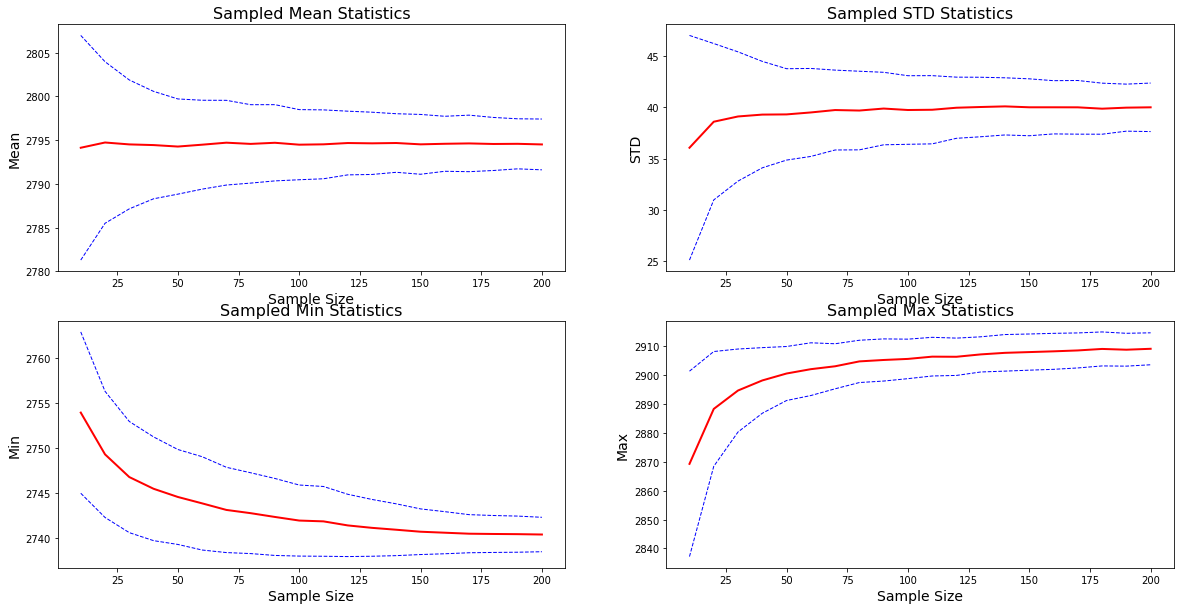

In [73]:
nsamp = np.arange(10,210,10)  # vector for samples
nMC = 1000  # number of simulations
sMeans = np.zeros((nMC, len(nsamp)))  # create list for mean values
sMins  = np.zeros((nMC, len(nsamp)))  # create list for min values
sMaxes = np.zeros((nMC, len(nsamp)))  # create list for max values
sSTDs  = np.zeros((nMC, len(nsamp)))  # create list for std values

for m in range(len(nsamp)):  # setup index i
    for n in range(nMC):  # set sim number
        V1 = np.random.choice(Elevation, size=nsamp[m], replace=True)  # random samples
        vMean = np.mean(V1)  # random sample mean
        sMeans[n, m] = vMean  # store variable to array
        vMin   = np.min(V1)  # random sample min
        sMins[n, m] = vMin  # store variable to array
        vMax   = np.max(V1)  # random sample max
        sMaxes[n, m] = vMax  # store variable to array
        vSTD   = np.std(V1)  # random sample std
        sSTDs[n, m] = vSTD  # store variable to array

sMean = sMeans.mean(axis=0)  # calculate mean for each column
sMeanSTD = sMeans.std(axis=0)  # calculate std for each column
sMin = sMins.mean(axis=0)  # calculate mean for each column
sMinSTD = sMins.std(axis=0)  # calculate std for each column
sMax = sMaxes.mean(axis=0)  # calculate mean for each column
sMaxSTD = sMaxes.std(axis=0)  # calculate std for each column
sSTD = sSTDs.mean(axis=0)  # calculate mean for each column
sSTDSTD = sSTDs.std(axis=0)  # calculate std for each column

plt.figure(figsize=(20,10))  # create a figure

# Means
data = sMean  # set figure data
dataSTD = sMeanSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,1)  # assign subplot
plt.plot(nsamp, data,'r',linewidth=2)  # random means
plt.plot(nsamp, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(nsamp, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled Mean Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('Mean',fontsize=14)  # y axis

# STD
data = sSTD  # set figure data
dataSTD = sSTDSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,2)  # assign subplot
plt.plot(nsamp, data,'r',linewidth=2)  # random means
plt.plot(nsamp, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(nsamp, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled STD Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('STD',fontsize=14)  # y axis

# Mins
data = sMin  # set figure data
dataSTD = sMinSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,3)  # assign subplot
plt.plot(nsamp, data,'r',linewidth=2)  # random means
plt.plot(nsamp, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(nsamp, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled Min Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('Min',fontsize=14)  # y axis

# Maxes
data = sMax  # set figure data
dataSTD = sMaxSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,4)  # assign subplot
plt.plot(nsamp, data,'r',linewidth=2)  # random means
plt.plot(nsamp, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(nsamp, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled Max Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('Max',fontsize=14)  # y axis

plt.show()  # show image

### 12.  Plot the relative density histogram and normal pdf for uniform sampling with a spacing of 200 meters. Assume the dataset spans 1000m x 1000m, and sample uniformly in both directions.
Create an nD dataset with no nans first

1. estimate spacing; its 1k x 1k, it has xRows and yColumns, that is the spacing parameters
dx = 1000/nColumns
dy = 1000/nRows
2. 200m spacing only uses values at spacing interval
nX = round(200/dx)
nY = round(200/dy)
3. calculate statistics like above
4. shift starting point and rerun process
i.e. 1=starting position: Elevation(1:nX:end, 1:nY:end)
select all rows and every other column: Elevation(:,1:2:end)

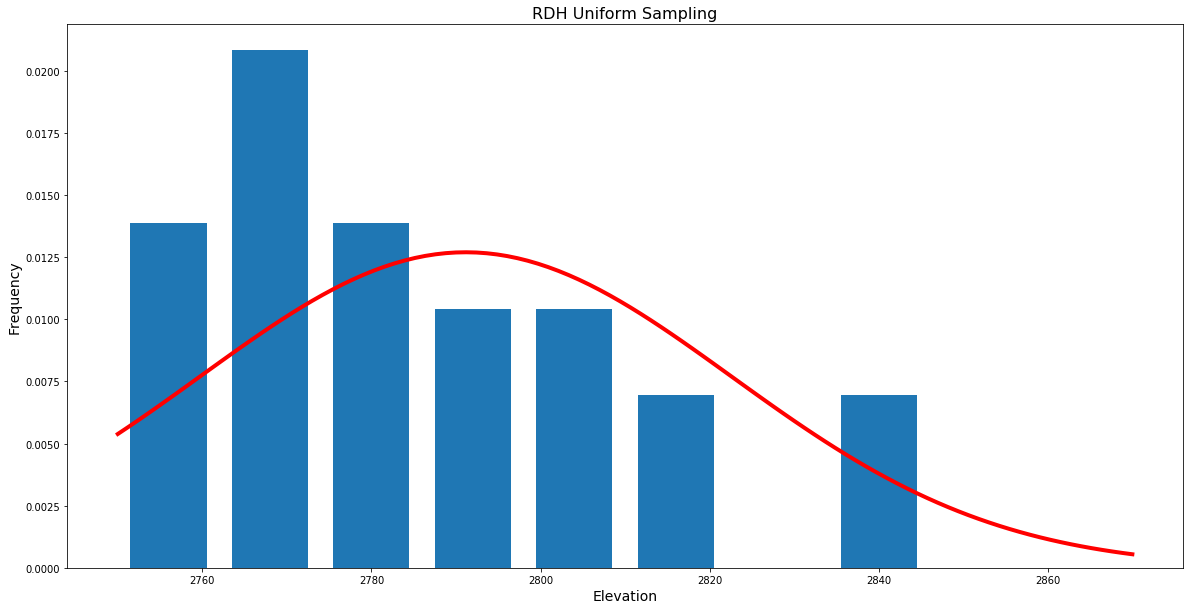

In [74]:
Elev = df.values
rows = np.shape(Elev)[0]  # number of rows
cols = np.shape(Elev)[1]  # number of columns
dx = 1000/rows  # x spacing out of 1000m
dy = 1000/cols  # y spacing out of 1000m
nX = round(200/dx)  # 200m spacing interval
nY = round(200/dy)  # 200m spacing interval
sUniform = Elev[0:rows:nX, 0:cols:nY]   # create uniform sample data
sUniform = sUniform[sUniform > 0]  # eliminate null values and vectorize

plt.figure(figsize=(20,10))  # create a figure
# Means
data = sUniform  # set data
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # set bin info
dataRange = np.linspace(np.min(data), np.max(data), 100)  # set a range limit for Gaus line
plt.plot(dataRange,mlab.normpdf(dataRange,np.mean(data),np.std(data)),'r',linewidth=4)  #  pdf line
plt.hist(data,bins=binWidth, rwidth=0.75, normed=True)  # relative density histogram
plt.title('RDH Uniform Sampling', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info
plt.show()  # show figure

### 13. Repeat for uniform sampling with a spacing of 30 meters.

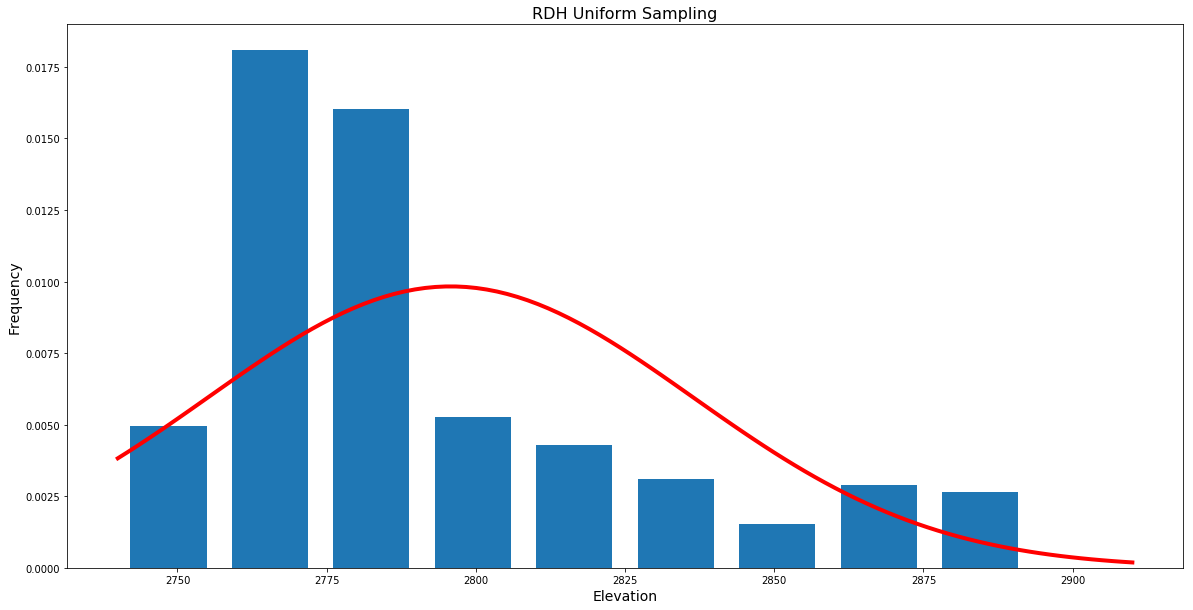

In [75]:
Elev = df.values
rows = np.shape(Elev)[0]  # number of rows
cols = np.shape(Elev)[1]  # number of columns
dx = 1000/rows  # x spacing out of 1000m
dy = 1000/cols  # y spacing out of 1000m
nX = round(30/dx)  # 200m spacing interval
nY = round(30/dy)  # 200m spacing interval
sUniform = Elev[0:rows:nX, 0:cols:nY]   # create uniform sample data
sUniform = sUniform[sUniform > 0]  # eliminate null values and vectorize

plt.figure(figsize=(20,10))  # create a figure
# Means
data = sUniform  # set data
binWidth = np.arange(min(data), max(data), round(max(data)-min(data))/10.)  # set bin info
dataRange = np.linspace(np.min(data), np.max(data), 100)  # set a range limit for Gaus line
plt.plot(dataRange,mlab.normpdf(dataRange,np.mean(data),np.std(data)),'r',linewidth=4)  #  pdf line
plt.hist(data,bins=binWidth, rwidth=0.75, normed=True)  # relative density histogram
plt.title('RDH Uniform Sampling', fontsize=16)  # title info
plt.xlabel('Elevation', fontsize=14)  # x axis info
plt.ylabel('Frequency', fontsize=14)  # y axis info
plt.show()  # show figure

### 14. Plot the sample statistics and their uncertainties for uniform sampling, as a function of sample size.

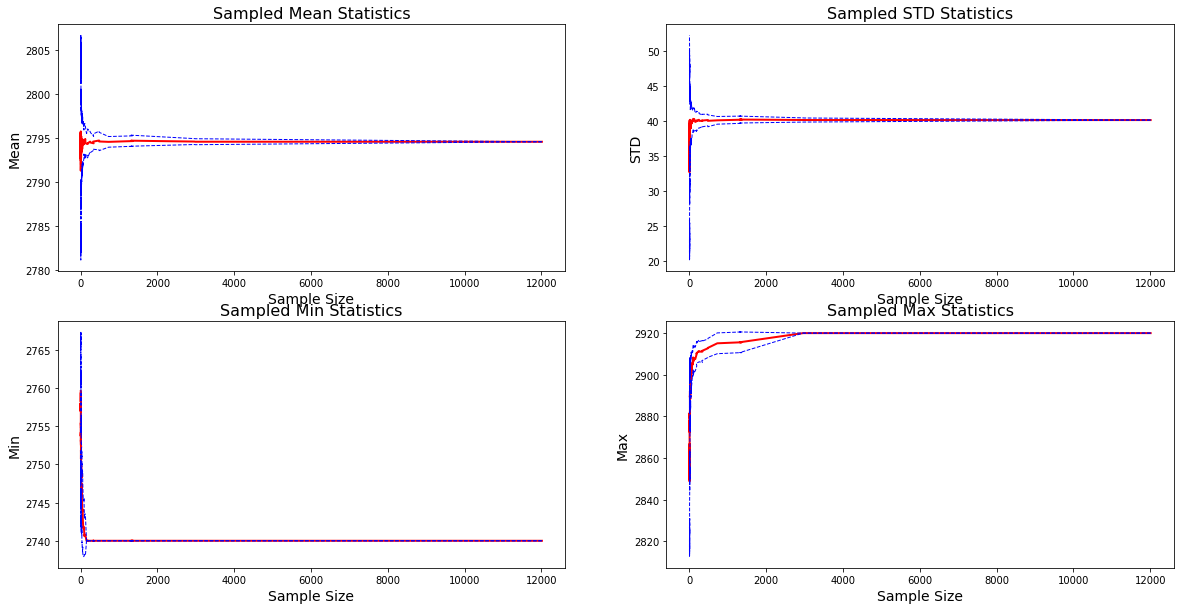

In [76]:
Elev = df.values  # elevation data
rows = np.shape(Elev)[0]  # number of rows
cols = np.shape(Elev)[1]  # number of columns
dx = 1000//rows  # x spacing out of 1000m
dy = 1000//cols  # y spacing out of 1000m
nsamp = np.arange(10,500,5)  # vector for samples
nMC = 100  # number of simulations
sMeans = np.zeros((nMC, len(nsamp)))  # create list for mean values
sMins  = np.zeros((nMC, len(nsamp)))  # create list for min values
sMaxes = np.zeros((nMC, len(nsamp)))  # create list for max values
sSTDs  = np.zeros((nMC, len(nsamp)))  # create list for std values
space  = np.zeros((len(nsamp)))  # create list for sample spacing

for m in range(len(nsamp)):  # setup index m
    for n in range(nMC):  # set simulation number
            nX = round(nsamp[m])//dx  # spacing interval
            nY = round(nsamp[m])//dy  # spacing interval
            dX = np.random.choice(nX, replace=True)  # random starting interval
            dY = np.random.choice(nY, replace=True)  # random starting interval
            V1 = Elev[dX:rows:nX, dY:cols:nY]  # create uniform sample data
            V1 = V1[V1 > 0]  # eliminate null values and vectorize
            space[m] = len(V1)
            vMean = np.mean(V1)  # random sample mean
            sMeans[n,m] = vMean  # store variable to array
            vMin   = np.min(V1)  # random sample min
            sMins[n,m] = vMin  # store variable to array
            vMax   = np.max(V1)  # random sample max
            sMaxes[n,m] = vMax  # store variable to array
            vSTD   = np.std(V1)  # random sample std
            sSTDs[n,m] = vSTD  # store variable to array


sMean = sMeans.mean(axis=0)  # calculate mean for each column
sMeanSTD = sMeans.std(axis=0)  # calculate std for each column
sMin = sMins.mean(axis=0)  # calculate mean for each column
sMinSTD = sMins.std(axis=0)  # calculate std for each column
sMax = sMaxes.mean(axis=0)  # calculate mean for each column
sMaxSTD = sMaxes.std(axis=0)  # calculate std for each column
sSTD = sSTDs.mean(axis=0)  # calculate mean for each column
sSTDSTD = sSTDs.std(axis=0)  # calculate std for each column
space = np.array(space)

plt.figure(figsize=(20,10))  # create a figure

# Means
data = sMean  # set figure data
dataSTD = sMeanSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,1)  # assign subplot
plt.plot(space, data,'r',linewidth=2)  # samples
plt.plot(space, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(space, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled Mean Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('Mean',fontsize=14)  # y axis

# STD
data = sSTD  # set figure data
dataSTD = sSTDSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,2)  # assign subplot
plt.plot(space, data,'r',linewidth=2)  # samples
plt.plot(space, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(space, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled STD Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('STD',fontsize=14)  # y axis

# Mins
data = sMin  # set figure data
dataSTD = sMinSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,3)  # assign subplot
plt.plot(space, data,'r',linewidth=2)  # samples
plt.plot(space, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(space, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled Min Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('Min',fontsize=14)  # y axis

# Maxes
data = sMax  # set figure data
dataSTD = sMaxSTD  # data std
dSTD1 = data + dataSTD  # mean + std
dSTD2 = data - dataSTD  # mean - std
plt.subplot(2,2,4)  # assign subplot
plt.plot(space, data,'r',linewidth=2)  # samples
plt.plot(space, dSTD1,'--b',linewidth=1)  # +1 std
plt.plot(space, dSTD2,'--b',linewidth=1)  # -1 std
plt.title('Sampled Max Statistics',fontsize=16)  # title
plt.xlabel('Sample Size',fontsize=14)  # x axis
plt.ylabel('Max',fontsize=14)  # y axis

plt.show()  # show image